In [1]:
!pip install torch torchaudio transformers datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]

Dataset({
    features: ['filename', 'xvector'],
    num_rows: 7931
})


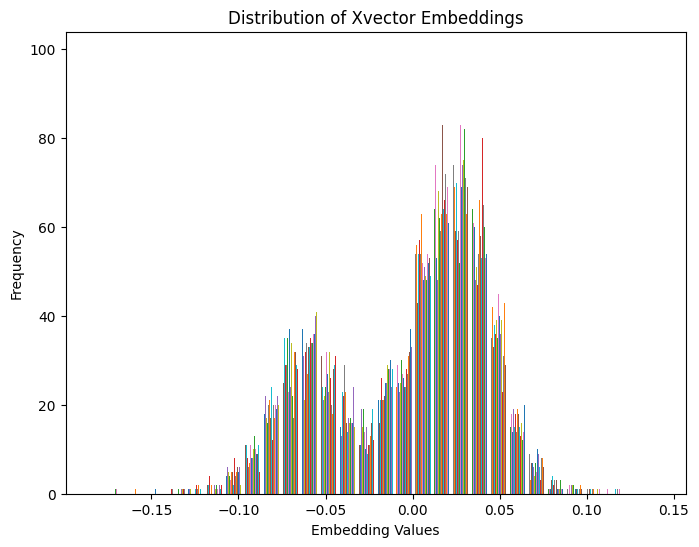

In [2]:
#the first model we will be using is SpeechT5
import torch
import torchaudio
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech
from datasets import load_dataset
from transformers import SpeechT5HifiGan
import matplotlib.pyplot as plt
from scipy.io.wavfile import write



processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

# Print dataset information
print(dataset)

# Extract features to visualize
# Example: Extract xvector embeddings
xvector_embeddings = [sample["xvector"] for sample in dataset]

# Visualize the embeddings (Example: Plot histograms of embeddings)
plt.figure(figsize=(8, 6))
plt.hist(xvector_embeddings, bins=30)
plt.title("Distribution of Xvector Embeddings")
plt.xlabel("Embedding Values")
plt.ylabel("Frequency")
plt.show()





In [3]:

inputs = processor(text="The creatures outside looked from pig to man, and from man to pig, and from pig to man again; but already it was impossible to say which was which.", return_tensors="pt")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)


from IPython.display import Audio

Audio(speech, rate=16000)


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [7]:
from transformers import BarkModel, BarkProcessor
import scipy
import numpy
from IPython.display import Audio

model = BarkModel.from_pretrained("suno/bark-small")
processor = BarkProcessor.from_pretrained("suno/bark-small")

# also add a speaker embedding

inputs = processor("There are lot of things I could talk about but it would probably sound similar to this ", voice_preset="v2/en_speaker_3",)
audio_array = model.generate(**inputs)
audio_array = audio_array.cpu().numpy().squeeze()

sample_rate = model.generation_config.sample_rate
Audio(audio_array, rate=sample_rate)

import scipy

sample_rate = model.generation_config.sample_rate
scipy.io.wavfile.write("bark_out.wav", rate=sample_rate, data=audio_array)

inputs = processor("[clears throat] I am too fond of reading books to care to write them [cough]", voice_preset="v2/en_speaker_5",)
audio_array = model.generate(**inputs)
audio_array = audio_array.cpu().numpy().squeeze()

sample_rate = model.generation_config.sample_rate
Audio(audio_array, rate=sample_rate)

import scipy

sample_rate = model.generation_config.sample_rate
scipy.io.wavfile.write("bark_out1.wav", rate=sample_rate, data=audio_array)







/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/usr/local/lib/python3.10/dist-packages/transformers/models/encodec/modeling_encodec.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
The attentio

en_speaker_5_semantic_prompt.npy:   0%|          | 0.00/2.52k [00:00<?, ?B/s]

en_speaker_5_coarse_prompt.npy:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

en_speaker_5_fine_prompt.npy:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [8]:
from transformers import VitsModel, AutoTokenizer
import scipy

model = VitsModel.from_pretrained("facebook/mms-tts-hin")
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-hin")

text = "मेरा नाम उसवा है।"

inputs = tokenizer(text, return_tensors="pt")
input_ids = inputs["input_ids"]


with torch.no_grad():
    outputs = model(input_ids)



speech = outputs["waveform"]
Audio(speech, rate=16000)

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/mms-tts-hin were not used when initializing VitsModel: ['flow.flows.0.wavenet.in_layers.0.weight_g', 'flow.flows.0.wavenet.in_layers.0.weight_v', 'flow.flows.0.wavenet.in_layers.1.weight_g', 'flow.flows.0.wavenet.in_layers.1.weight_v', 'flow.flows.0.wavenet.in_layers.2.weight_g', 'flow.flows.0.wavenet.in_layers.2.weight_v', 'flow.flows.0.wavenet.in_layers.3.weight_g', 'flow.flows.0.wavenet.in_layers.3.weight_v', 'flow.flows.0.wavenet.res_skip_layers.0.weight_g', 'flow.flows.0.wavenet.res_skip_layers.0.weight_v', 'flow.flows.0.wavenet.res_skip_layers.1.weight_g', 'flow.flows.0.wavenet.res_skip_layers.1.weight_v', 'flow.flows.0.wavenet.res_skip_layers.2.weight_g', 'flow.flows.0.wavenet.res_skip_layers.2.weight_v', 'flow.flows.0.wavenet.res_skip_layers.3.weight_g', 'flow.flows.0.wavenet.res_skip_layers.3.weight_v', 'flow.flows.1.wavenet.in_layers.0.weight_g', 'flow.flows.1.wavenet.in_layers.0.weight_v', 'flow.flows.1.wavenet.in_layers.1.wei

tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

In [9]:
from google.colab import files

files.download("/content/bark_out1.wav")
files.download("/content/bark_out.wav")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
pip install git+https://github.com/suno-ai/bark.git


  Cloning https://github.com/suno-ai/bark.git to /tmp/pip-req-build-54594xtz
  Running command git clone --filter=blob:none --quiet https://github.com/suno-ai/bark.git /tmp/pip-req-build-54594xtz
  Resolved https://github.com/suno-ai/bark.git to commit f4f32d4cd480dfec1c245d258174bc9bde3c2148
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached boto3-1.34.103-py3-none-any.whl (139 kB)
  Using cached encodec-0.1.1-py3-none-any.whl
  Using cached botocore-1.34.103-py3-none-any.whl (12.2 MB)
  Using cached s3transfer-0.10.1-py3-none-any.whl (82 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Created wheel for suno-bark: filename=suno_bark-0.0.1a0-py3-none-any.whl size=2567358 sha256=ada2ccfe2cc4c293de6907ad5b4106cc960688a3

In [3]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


from IPython.display import Audio
import nltk  # we'll use this to split into sentences
import numpy as np

from bark.generation import (
    generate_text_semantic,
    preload_models,
)
from bark.api import semantic_to_waveform
from bark import generate_audio, SAMPLE_RATE

In [4]:
speaker_lookup = {"Samantha": "v2/en_speaker_9", "John": "v2/en_speaker_2"}


script = """
Samantha: Hey everyone. Welcome to my Podcast. My name is Uswa and I'd like to introduce my special guest John.

John: I am John. An AI generated voice. I am generated for the Uswa's final project. [crying] She's about to graduate.

Samantha: Yes it's bitter sweet. But mainly sweet because she's cynical [laughs]

John: This is the only AI project that she deems worth it. And the TA is nice.

Samantha: Yes she will definitely give Uswa full marks [laughs].
"""
script = script.strip().split("\n")
script = [s.strip() for s in script if s]
script

["Samantha: Hey everyone. Welcome to my Podcast. My name is Uswa and I'd like to introduce my special guest John.",
 "John: I am John. An AI generated voice. I am generated for the Uswa's final project. [crying] She's about to graduate.",
 "Samantha: Yes it's bitter sweet. But mainly sweet because she's cynical [laughs]",
 'John: This is the only AI project that she deems worth it. And the TA is nice.',
 'Samantha: Yes she will definitely give Uswa full marks [laughs].']

In [ ]:
pieces = []
silence = np.zeros(int(0.5*SAMPLE_RATE))
for line in script:
    speaker, text = line.split(": ")
    audio_array = generate_audio(text, history_prompt=speaker_lookup[speaker], )
    pieces += [audio_array, silence.copy()]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


text_2.pt:   0%|          | 0.00/5.35G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

coarse_2.pt:   0%|          | 0.00/3.93G [00:00<?, ?B/s]

fine_2.pt:   0%|          | 0.00/3.74G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
Downloading: "https://dl.fbaipublicfiles.com/encodec/v0/encodec_24khz-d7cc33bc.th" to /root/.cache/torch/hub/checkpoints/encodec_24khz-d7cc33bc.th
100%|██████████| 88.9M/88.9M [00:02<00:00, 46.6MB/s]
 48%|████▊     | 366/768 [01:10<01:16,  5.24it/s]

In [ ]:
Audio(np.concatenate(pieces), rate=SAMPLE_RATE)